In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import trange
from matplotlib.pyplot import figure
import json

In [2]:
dir = "~/PhD/Intel-Neuromorphic-Research-Project/output/SC_debug_full/"
hidden_spike_counts = np.load(os.path.expanduser(dir + "hidden_spike_counts_unfiltered.npy"))

In [3]:
with open(os.path.expanduser(dir + "params.json"), "r") as f:
        params = json.load(f)

In [4]:
all_neurons_list = list([[] * 2] * hidden_spike_counts.shape[1])
average_neurons_list = list([0] * hidden_spike_counts.shape[1])

In [5]:
all_neurons_list = [[] for _ in range(hidden_spike_counts.shape[1])]

#outer loop
for e in trange(params.get("NUM_EPOCH")):

    average_neurons_list = [[] for _ in range(hidden_spike_counts.shape[1])]

    for t in range(int(hidden_spike_counts.shape[0] / params.get("NUM_EPOCH"))):
        temp = (e * int(hidden_spike_counts.shape[0] / params.get("NUM_EPOCH"))) + t
        for n in range(hidden_spike_counts.shape[1]):
            average_neurons_list[n].append(hidden_spike_counts[temp][n])
    
    # calc average
    for n in range(hidden_spike_counts.shape[1]):
        all_neurons_list[n].append(sum(average_neurons_list[n]))


100%|██████████| 50/50 [02:54<00:00,  3.49s/it]


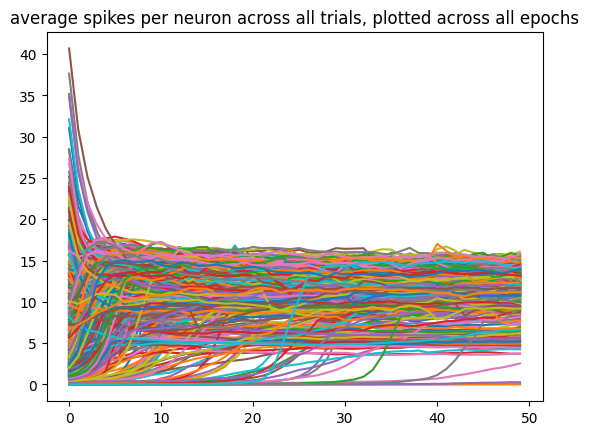

In [6]:
for n in range(len(all_neurons_list)):
    temp = all_neurons_list[n]
    for i in range(len(temp)):
        temp[i] = temp[i] / int(hidden_spike_counts.shape[0] / params.get("NUM_EPOCH"))
    plt.plot(temp)

plt.title("average spikes per neuron across all trials, plotted across all epochs")
plt.show()

In [7]:
len(all_neurons_list)

512

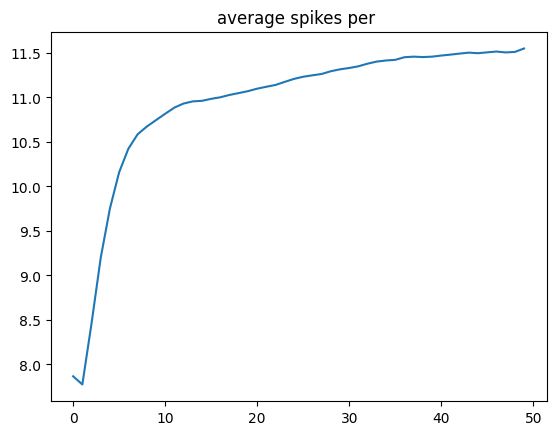

In [8]:
# get average

average_across_neurons = []

for e in range(params.get("NUM_EPOCH")):
    average_across_epoch = 0
    for n in range(hidden_spike_counts.shape[1]):
        average_across_epoch += all_neurons_list[n][e]

    average_across_neurons.append(average_across_epoch / hidden_spike_counts.shape[1])

plt.title("average spikes per ")
plt.plot(average_across_neurons)
plt.show()

<BarContainer object of 512 artists>

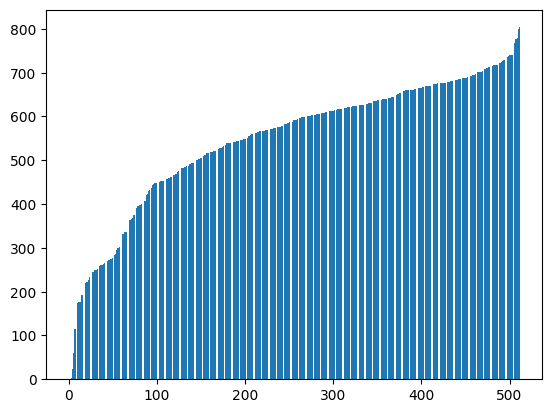

In [9]:
sum_spikes_per_neuron = []
for n in range(hidden_spike_counts.shape[1]):
    sum_spikes_per_neuron.append(sum(all_neurons_list[n]))

neuron_id = list(range(hidden_spike_counts.shape[1]))

plt.title("")
plt.bar(neuron_id, sorted(sum_spikes_per_neuron))

100%|██████████| 100/100 [00:21<00:00,  4.60it/s]


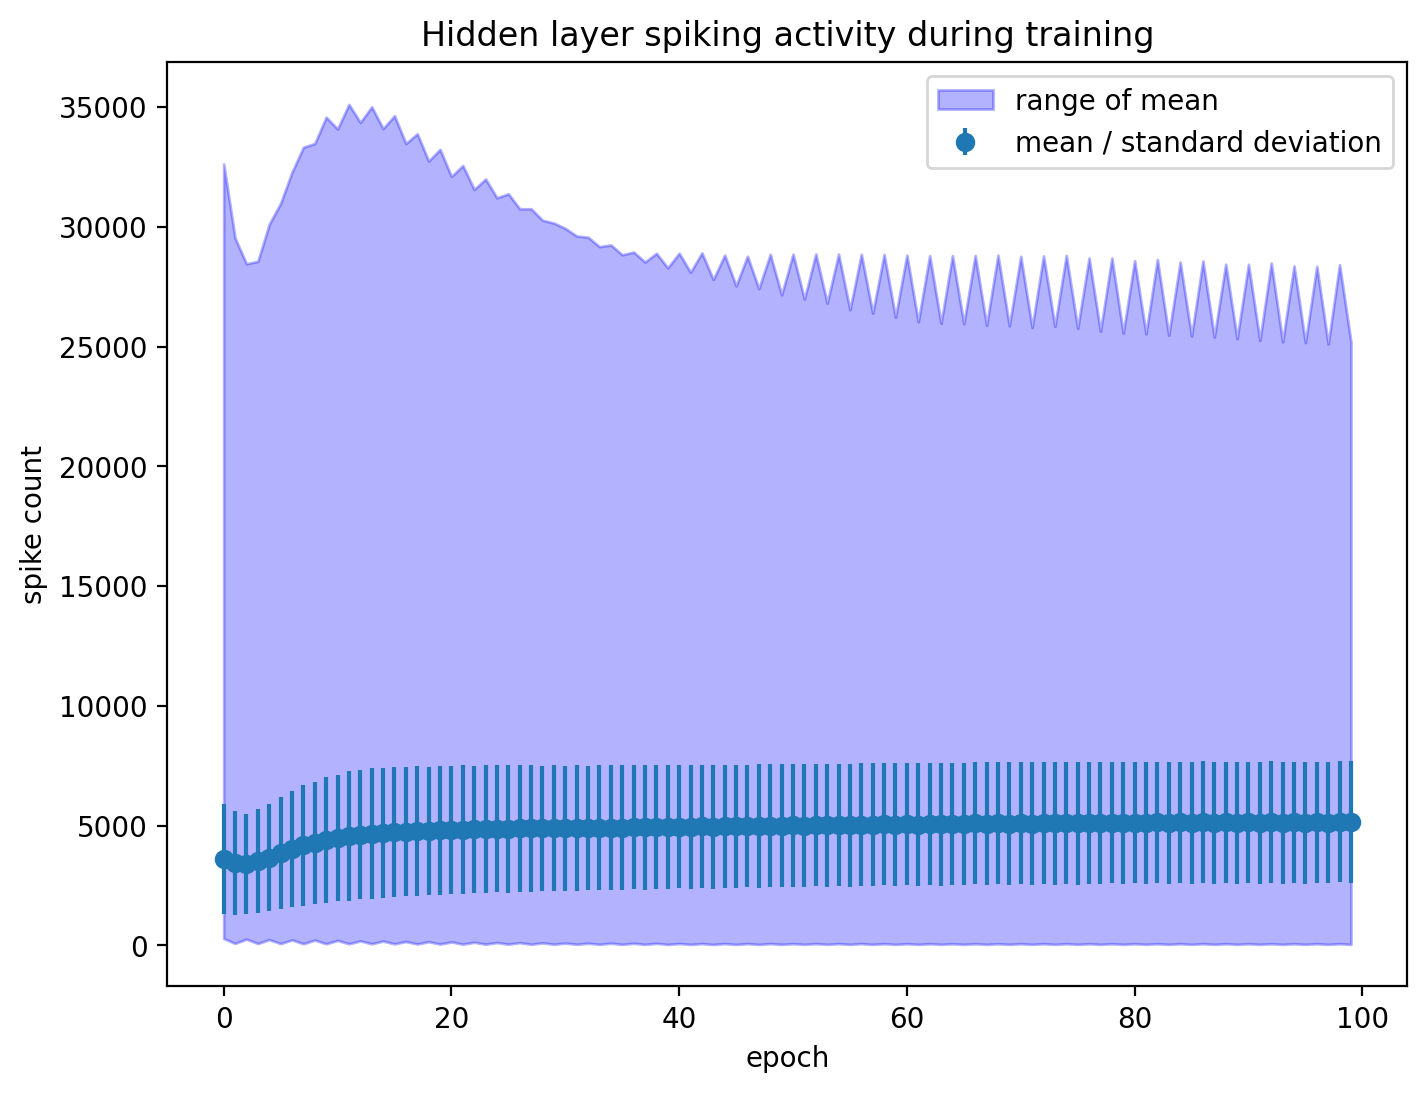

In [10]:
# plot mean spikes per epoch
epochs = 100
samples_per_epoch = int(len(hidden_spike_counts) / epochs) #epochs
mean_spikes_per_epoch = []
mean_min, mean_max = [], []
std_spikes_per_epoch = []
std_min, std_max = [], []

for e in trange(epochs):
    total_number_of_spikes = []
    m_min = np.sum(hidden_spike_counts[(e * samples_per_epoch)])
    m_max = np.sum(hidden_spike_counts[(e * samples_per_epoch)])
    s_min = np.std(hidden_spike_counts[(e * samples_per_epoch)])
    s_max = np.std(hidden_spike_counts[(e * samples_per_epoch)])
    
    for s in range(samples_per_epoch):
        if s < 7424: #due to additional values stored between 8156 and epoch size 
            no_of_spikes = np.sum(hidden_spike_counts[(e * samples_per_epoch) + s])
            sd_of_spikes = np.std(hidden_spike_counts[(e * samples_per_epoch) + s])
            
            if no_of_spikes > m_max:
                m_max = no_of_spikes
            if no_of_spikes < m_min:
                m_min = no_of_spikes                     
                                
            total_number_of_spikes.append(np.sum(hidden_spike_counts[(e * samples_per_epoch) + s]))
                    
    mean_spikes_per_epoch.append(np.sum(total_number_of_spikes) / samples_per_epoch)
    mean_min.append(m_min)
    mean_max.append(m_max)
    std_min.append(s_min)
    std_max.append(s_max)
    std_spikes_per_epoch.append(np.std(total_number_of_spikes))
    
#plt.plot(mean_spikes_per_epoch, label = "mean")
figure(figsize=(8, 6), dpi=200)
plt.errorbar(list(range(epochs)), mean_spikes_per_epoch, std_spikes_per_epoch, fmt='o', label = "mean / standard deviation")
#plt.plot(std_spikes_per_epoch, label = "std")
plt.fill_between(list(range(epochs)), mean_max, mean_min, alpha = 0.3, color = "blue", label = "range of mean")
plt.xlabel("epoch")
plt.ylabel("spike count")
plt.legend()
plt.title("Hidden layer spiking activity during training")
#plt.ylim(0, 3000)
plt.show()

In [11]:

with open('hidden_spike_counts.npy', 'rb') as f:

    hidden_spike_counts = np.load(f)

# plot mean spikes per epoch
epochs = 50
samples_per_epoch = int(len(hidden_spike_counts) / epochs) #epochs
mean_spikes_per_epoch = []
mean_min, mean_max = [], []
std_spikes_per_epoch = []

for e in trange(epochs):
    total_number_of_spikes = []
    m_min = np.sum(hidden_spike_counts[(e * samples_per_epoch)])
    m_max = np.sum(hidden_spike_counts[(e * samples_per_epoch)])
    
    for s in range(samples_per_epoch):
        if s < 8156: #due to additional values stored between 8156 and epoch size 
            no_of_spikes = np.sum(hidden_spike_counts[(e * samples_per_epoch) + s])
            sd_of_spikes = np.std(hidden_spike_counts[(e * samples_per_epoch) + s])
            
            if no_of_spikes > m_max:
                m_max = no_of_spikes
            if no_of_spikes < m_min:
                m_min = no_of_spikes                     
                                
            total_number_of_spikes.append(np.sum(hidden_spike_counts[(e * samples_per_epoch) + s]))
        
    mean_spikes_per_epoch.append(np.sum(total_number_of_spikes) / samples_per_epoch)
    mean_min.append(m_min)
    mean_max.append(m_max)
    std_spikes_per_epoch.append(np.std(total_number_of_spikes))
    
#plt.plot(mean_spikes_per_epoch, label = "mean")
plt.errorbar(list(range(epochs)), mean_spikes_per_epoch, std_spikes_per_epoch, fmt='o')
#plt.plot(std_spikes_per_epoch, label = "std")
plt.fill_between(list(range(epochs)), mean_max, mean_min, alpha = 0.3, color = "blue", label = "range of mean")
plt.xlabel("epoch")
plt.legend()
plt.title("mean spikes per epoch with regularisation")
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'hidden_spike_counts.npy'

In [ ]:
# for cross validation

os.chdir("HD_eventprop_cross_validation_output")

In [ ]:

with open('hidden_spike_counts.npy', 'rb') as f:

    hidden_spike_counts = np.load(f)

# plot mean spikes per epoch
epochs = 50
samples_per_epoch = int(len(hidden_spike_counts) / epochs) #epochs
mean_spikes_per_epoch = []
mean_min, mean_max = [], []
std_spikes_per_epoch = []

for e in trange(epochs):
    total_number_of_spikes = []
    m_min = np.sum(hidden_spike_counts[(e * samples_per_epoch)])
    m_max = np.sum(hidden_spike_counts[(e * samples_per_epoch)])
    
    for s in range(samples_per_epoch):
        if s < 8156: #due to additional values stored between 8156 and epoch size 
            no_of_spikes = np.sum(hidden_spike_counts[(e * samples_per_epoch) + s])
            sd_of_spikes = np.std(hidden_spike_counts[(e * samples_per_epoch) + s])
            
            if no_of_spikes > m_max:
                m_max = no_of_spikes
            if no_of_spikes < m_min:
                m_min = no_of_spikes                     
                                
            total_number_of_spikes.append(np.sum(hidden_spike_counts[(e * samples_per_epoch) + s]))
        
    mean_spikes_per_epoch.append(np.sum(total_number_of_spikes) / samples_per_epoch)
    mean_min.append(m_min)
    mean_max.append(m_max)
    std_spikes_per_epoch.append(np.std(total_number_of_spikes))
    


In [ ]:
#plt.plot(mean_spikes_per_epoch, label = "mean")
figure(figsize=(8, 6), dpi=200)
plt.errorbar(list(range(epochs)), mean_spikes_per_epoch, std_spikes_per_epoch, fmt='o', label = "mean / standard deviation")
#plt.plot(std_spikes_per_epoch, label = "std")
plt.fill_between(list(range(epochs)), mean_max, mean_min, alpha = 0.3, color = "blue", label = "range of mean")
plt.xlabel("epoch")
plt.ylabel("spike count")
plt.legend()
plt.title("Hidden layer spiking activity during training")
plt.show()